In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
### read dataset innerArm

In [4]:
#df = pd.read_csv("innerArm.csv")
df = pd.read_csv("Merge.csv")
df.head(5)

,patientID,has_DM2,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var3152,Var3153,Var3154,Var3155,Var3156,Var3157,Var3158,Var3159,Var3160,Var3161
0,ramanShift,NaN,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,...,3150,3151,3152,3153,3154,3155,3156,3157,3158,3159
1,DM201,1.0,181.800000,181.800000,181.800000,181.800000,181.800000,181.800000,181.800000,181.800000,...,0,0,0,0,0,0,0,0,0,0
2,DM202,1.0,162.800000,162.800000,162.800000,162.800000,162.800000,162.800000,162.800000,162.800000,...,0,0,0,0,0,0,0,0,0,0
3,DM203,1.0,107.400000,107.400000,107.400000,107.400000,107.400000,107.400000,107.400000,107.400000,...,0,0,0,0,0,0,0,0,0,0
4,DM204,1.0,290.166667,290.166667,290.166667,290.166667,290.166667,290.166667,290.166667,290.166667,...,0,0,0,0,0,0,0,0,0,0


In [5]:
### delete 1rs row (wave) and drop patientID col

In [6]:
patientID = df.pop('patientID')

In [7]:
df.drop(0, inplace=True)
df = df.reset_index(drop=True)
df.head(5)

,has_DM2,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var3152,Var3153,Var3154,Var3155,Var3156,Var3157,Var3158,Var3159,Var3160,Var3161
0,1.0,181.800000,181.800000,181.800000,181.800000,181.800000,181.800000,181.800000,181.800000,181.800000,...,0,0,0,0,0,0,0,0,0,0
1,1.0,162.800000,162.800000,162.800000,162.800000,162.800000,162.800000,162.800000,162.800000,162.800000,...,0,0,0,0,0,0,0,0,0,0
2,1.0,107.400000,107.400000,107.400000,107.400000,107.400000,107.400000,107.400000,107.400000,107.400000,...,0,0,0,0,0,0,0,0,0,0
3,1.0,290.166667,290.166667,290.166667,290.166667,290.166667,290.166667,290.166667,290.166667,290.166667,...,0,0,0,0,0,0,0,0,0,0
4,1.0,50.600000,50.600000,50.600000,50.600000,50.600000,50.600000,50.600000,50.600000,50.600000,...,0,0,0,0,0,0,0,0,0,0


### Crop Data to 800-1800 cm^-1 ###

In [8]:
import re
droped_columns = []
df.drop(['Var2'], axis = 'columns', inplace=True)
for col in df.columns:
    #print("------------------------------>" + re.findall(r'\d+', col)[0])
    if int(re.findall(r'\d+', col)[0]) > 2:
        #print(re.findall(r'\d+', col)[0])
        if int(re.findall(r'\d+', col)[0]) <= 800 or int(re.findall(r'\d+', col)[0]) >= 1800:
            droped_columns.append(col)

In [9]:
df.drop(droped_columns, axis=1, inplace=True)
df = df.reset_index(drop=True)

In [10]:
df.head()

,has_DM2,Var801,Var802,Var803,Var804,Var805,Var806,Var807,Var808,Var809,...,Var1790,Var1791,Var1792,Var1793,Var1794,Var1795,Var1796,Var1797,Var1798,Var1799
0,1.0,187.887152,191.185864,195.943112,197.019885,194.774564,192.743616,191.215888,190.194934,195.590097,...,51.245700,54.463985,56.393459,49.932257,47.622393,48.354281,51.604005,53.379442,51.303317,50.599999
1,1.0,169.308038,175.024512,183.282382,189.843460,194.872977,195.259000,184.744665,175.342270,180.018082,...,58.028577,56.525036,54.495767,52.179488,49.228832,45.813356,48.117433,51.241115,55.393367,55.345582
2,1.0,120.285950,120.814867,122.161259,124.735393,128.417717,129.147617,122.946858,117.390883,119.998546,...,27.668530,35.821674,43.497690,39.352768,34.854444,30.097175,28.998998,29.130067,31.572569,35.551240
3,1.0,305.211868,307.784993,313.469755,317.818830,320.962275,321.376920,315.385852,310.069199,313.291306,...,65.438088,65.602856,66.066346,66.371121,67.086658,68.103169,66.164164,65.640090,68.896758,68.855319
4,1.0,68.073479,67.170268,64.477484,64.899369,68.132629,69.567770,66.781921,64.206583,64.296500,...,13.479965,20.565450,26.566919,19.983809,17.903988,19.123801,19.314429,19.874544,21.462170,21.272791


### Matriz Correlación antes PCA. Dada la dimención de atributos es imposible leer nada.

Text(0.5, 1.0, 'Correlation ')

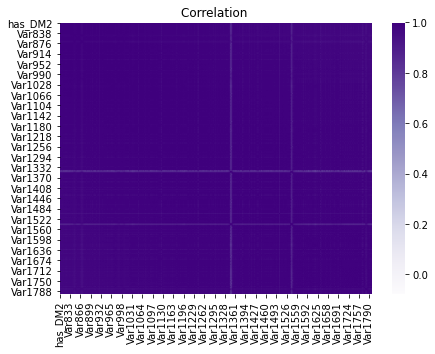

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=df.corr()
fig = plt.figure(figsize=(7,5))
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Correlation ")

### PCA using 15 components (segun el paper)

In [12]:
df.head(5)

,has_DM2,Var801,Var802,Var803,Var804,Var805,Var806,Var807,Var808,Var809,...,Var1790,Var1791,Var1792,Var1793,Var1794,Var1795,Var1796,Var1797,Var1798,Var1799
0,1.0,187.887152,191.185864,195.943112,197.019885,194.774564,192.743616,191.215888,190.194934,195.590097,...,51.245700,54.463985,56.393459,49.932257,47.622393,48.354281,51.604005,53.379442,51.303317,50.599999
1,1.0,169.308038,175.024512,183.282382,189.843460,194.872977,195.259000,184.744665,175.342270,180.018082,...,58.028577,56.525036,54.495767,52.179488,49.228832,45.813356,48.117433,51.241115,55.393367,55.345582
2,1.0,120.285950,120.814867,122.161259,124.735393,128.417717,129.147617,122.946858,117.390883,119.998546,...,27.668530,35.821674,43.497690,39.352768,34.854444,30.097175,28.998998,29.130067,31.572569,35.551240
3,1.0,305.211868,307.784993,313.469755,317.818830,320.962275,321.376920,315.385852,310.069199,313.291306,...,65.438088,65.602856,66.066346,66.371121,67.086658,68.103169,66.164164,65.640090,68.896758,68.855319
4,1.0,68.073479,67.170268,64.477484,64.899369,68.132629,69.567770,66.781921,64.206583,64.296500,...,13.479965,20.565450,26.566919,19.983809,17.903988,19.123801,19.314429,19.874544,21.462170,21.272791


In [13]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
#x = df.iloc[:,2:3159]
x = df.iloc[:,0:1799]
# Separating out the target
y = df.loc[:,['has_DM2']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

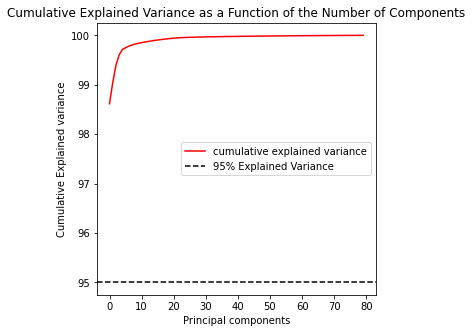

In [14]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(5, 5))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)

In [16]:
finalDf = pd.concat([principalDf, df[['has_DM2']]], axis = 1)
finalDf.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,has_DM2
0,-2.169739,1.918140,0.637853,0.386989,-0.762561,-0.055217,1.185240,0.947213,0.317738,-0.322883,0.177646,-0.309646,0.316554,0.107131,0.357526,1.0
1,-2.015611,0.476158,-3.847478,-0.007250,-0.942477,1.054212,-0.064666,-1.102668,-0.054830,0.646742,-0.357670,-0.480459,-0.040964,-0.594364,-0.153613,1.0
2,-19.446570,-0.865977,-0.648309,0.367380,-0.838624,0.560760,0.653266,0.243252,0.490421,-0.088518,0.261514,0.679660,0.415057,-0.580410,0.679961,1.0


In [17]:
#finalDf.describe()

### Matris correlación despues PCA 15

Text(0.5, 1.0, 'Correlation ')

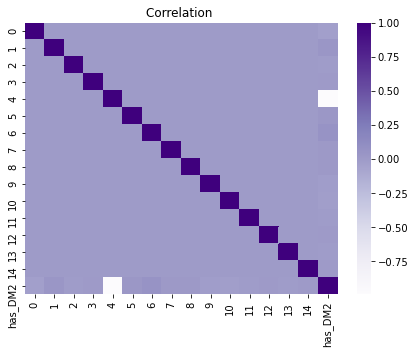

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=finalDf.corr()
fig = plt.figure(figsize=(7,5))
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Correlation ")

### Analisis de modelos sobre data set con PCA

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import svm

from sklearn.model_selection import cross_val_score, StratifiedKFold

In [20]:
X, y = finalDf.drop('has_DM2', axis=1), finalDf['has_DM2']

#### La precisión del modelo se evaluará utilizando el método de retención.
Con este enfoque, dejamos una fracción de la muestra de entrenamiento (generalmente del 20% al 40%), entrenamos el modelo con el resto de los datos (60-80% de la muestra original) y calculamos alguna métrica de la calidad del modelo ( por ejemplo, el más simple es la proporción de respuestas correctas en el problema de clasificación) en una muestra diferida.

### TRAIN AND TEST SPLIT

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=7)

### Escalado y normalizado

In [22]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [23]:
y.value_counts(normalize=True)

1.0    0.55
0.0    0.45
Name: has_DM2, dtype: float64

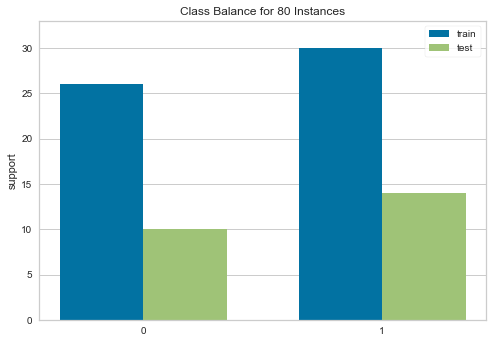

<AxesSubplot:title={'center':'Class Balance for 80 Instances'}, ylabel='support'>

In [24]:
# balanceo de clases en los conjuntos de test y train
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=[0, 1])
visualizer.fit(y_train, y_test)
visualizer.poof()

### Predicción sin optimización de hiper parametros

### K-NN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train)  

#print(knn.score(X_train, y_train))

KNeighborsClassifier(n_neighbors=3)

In [26]:
pred_test_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, pred_test_knn)
knn_accuracy

0.875

In [27]:
confusion_matrix(y_test, pred_test_logreg)

NameError: name 'pred_test_logreg' is not defined

### Logistic Regression

In [ ]:
logreg = LogisticRegression(random_state=17, solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train);

In [ ]:
pred_test_logreg = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, pred_test_logreg)
logreg_accuracy

In [ ]:
confusion_matrix(y_test, pred_test_logreg)

### Random Forest

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=10, n_jobs=2, random_state=7)
rf_clf.fit(X_train, y_train);

In [ ]:
pred_test_rf_clf = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, pred_test_rf_clf)
rf_accuracy

In [ ]:
confusion_matrix(y_test, pred_test_rf_clf)

### XGBoost

In [ ]:
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train);

In [ ]:
pred_test_xgbc = xgbc.predict(X_test)
XGB_accuracy = accuracy_score(y_test, pred_test_xgbc)
XGB_accuracy

In [ ]:
confusion_matrix(y_test, pred_test_xgbc)

### Support Vector Machines 1

In [ ]:
clf_svm = svm.SVC(gamma='scale')
clf_svm.fit(X_train, y_train);

In [ ]:
pred_test_svm = clf_svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, pred_test_svm)
svm_accuracy

In [ ]:
confusion_matrix(y_test, pred_test_svm)

### Support Vector Machines 2

In [ ]:
clf_svm = svm.SVC(C=2, decision_function_shape='ovo', gamma='auto', kernel='linear',
    random_state=1)
clf_svm.fit(X_train, y_train);

In [ ]:
pred_test_svm = clf_svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, pred_test_svm)
svm_accuracy

In [ ]:
confusion_matrix(y_test, pred_test_svm)

## Primera validación cruzada

In [ ]:
accuracy = pd.DataFrame({
    'xgboost': [XGB_accuracy],
    'logreg': [logreg_accuracy],
    'random forest': [rf_accuracy],
    'SVM': [svm_accuracy]
    }, index=['accuracy'])

In [ ]:
skf = StratifiedKFold(n_splits = 5, random_state=1, shuffle = True)

In [ ]:
svm_cvs = cross_val_score(clf_svm, X_train, y_train, scoring='accuracy', cv = skf).mean()
xgb_cvs = cross_val_score(xgbc, X_train, y_train, scoring='accuracy', cv = skf).mean()
logreg_cvs = cross_val_score(logreg, X_train, y_train, scoring='accuracy', cv = skf).mean()
rf_cvs = cross_val_score(rf_clf, X_train, y_train, scoring='accuracy', cv = skf).mean()

In [ ]:
accuracy_cvs = pd.DataFrame({
    'xgboost': [xgb_cvs],
    'logreg': [logreg_cvs],
    'random forest': [rf_cvs],
    'SVM': [svm_cvs]
    }, index=['cvs_mean'])

In [ ]:
accuracy = accuracy.append(accuracy_cvs)

In [ ]:
accuracy

### Optimización de los hiper-parámetros de los algoritmos para SVM y LongReg

#### Support Vecton Machive v2

In [ ]:
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
# Create a classifier object with the classifier and parameter candidates
clf = GridSearchCV(estimator=clf_svm, param_grid=parameter_candidates, n_jobs=-1, cv=5)

# Train the classifier on data1's feature and target data
clf.fit(X_train, y_train)  

In [ ]:
clf.best_score_

In [ ]:
clf.best_estimator_

In [ ]:
clf.score(X_test, y_test)

In [ ]:
pred_test_svm = clf.best_estimator_.predict(X_test)
svm_accuracy = accuracy_score(y_test, pred_test_svm)
svm_accuracy

In [ ]:
confusion_matrix(y_test, pred_test_svm)

#### Regresión logistica

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}

In [ ]:
logreg_cv = GridSearchCV(logreg,grid,cv=4)
logreg_cv.fit(X_train,y_train)

In [ ]:
logreg_cv.best_params_

In [ ]:
logreg_cv.best_score_

In [ ]:
pred_test_logreg_cv = logreg_cv.best_estimator_.predict(X_test)

In [ ]:
accuracy_score(y_test, pred_test_logreg_cv)

In [ ]:
confusion_matrix(y_test, pred_test_logreg_cv)

### Calidad del modelo (estimada en base a muestreo diferido)

In [ ]:
accuracy = pd.DataFrame({
    'xgboost': [XGB_accuracy],
    'logreg': [logreg_accuracy],
    'random forest': [rf_accuracy],
    'SVM': [svm_accuracy]
    }, index=['accuracy'])

In [ ]:
accuracy = accuracy.append(accuracy_cvs)
accuracy

### Validación cruzada


In [ ]:
skf = StratifiedKFold(n_splits = 5, random_state=1, shuffle = True)

In [ ]:
svm_cvs = cross_val_score(clf_svm, X_train, y_train, scoring='accuracy', cv = skf).mean()
xgb_cvs = cross_val_score(xgbc, X_train, y_train, scoring='accuracy', cv = skf).mean()
logreg_cvs = cross_val_score(logreg, X_train, y_train, scoring='accuracy', cv = skf).mean()
rf_cvs = cross_val_score(rf_clf, X_train, y_train, scoring='accuracy', cv = skf).mean()

In [ ]:
accuracy_cvs = pd.DataFrame({
    'xgboost': [xgb_cvs],
    'logreg': [logreg_cvs],
    'random forest': [rf_cvs],
    'SVM': [svm_cvs]
    }, index=['cvs_mean'])

In [ ]:
accuracy = accuracy.append(accuracy_cvs)

In [ ]:
accuracy

### Classification Report and ROC Curve

In [ ]:
print('**Logistic Regression**\n',classification_report(y_test, pred_test_logreg, target_names=['0 - healthy','1 - diabet ']))

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score,auc
fpr,tpr,_=roc_curve(y_test,pred_test_logreg)
#calculate AUC
roc_auc=auc(fpr,tpr)
print('ROC AUC: %0.2f' % roc_auc)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
print('**Random Forest**\n',classification_report(y_test, pred_test_rf_clf, target_names=['0 - healthy','1 - diabet ']))

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score,auc
fpr,tpr,_=roc_curve(y_test,pred_test_rf_clf)
#calculate AUC
roc_auc=auc(fpr,tpr)
print('ROC AUC: %0.2f' % roc_auc)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
print('**SVM**\n',classification_report(y_test, pred_test_svm, target_names=['0 - healthy','1 - diabet ']))

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score,auc
fpr,tpr,_=roc_curve(y_test,pred_test_svm)
#calculate AUC
roc_auc=auc(fpr,tpr)
print('ROC AUC: %0.2f' % roc_auc)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
print('**xgbc**\n',classification_report(y_test, pred_test_xgbc, target_names=['0 - healthy','1 - diabet ']))

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score,auc
fpr,tpr,_=roc_curve(y_test,pred_test_xgbc)
#calculate AUC
roc_auc=auc(fpr,tpr)
print('ROC AUC: %0.2f' % roc_auc)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

###  (confusion matrix) 

In [ ]:
print('**Logistic Regression**\n',confusion_matrix(y_test, pred_test_logreg))

In [ ]:
print('**Random Forest**\n',confusion_matrix(y_test, pred_test_rf_clf))

In [ ]:
print('**SVM**\n',confusion_matrix(y_test, pred_test_svm))

In [ ]:
print('**xgbc**\n',confusion_matrix(y_test, pred_test_xgbc))

## Artificial Neural Networks

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Conv2D,MaxPooling2D, Flatten

model = Sequential()
model.add(Dense(32,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

In [ ]:
print(model.summary())
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="sgd",metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=10, epochs=50, verbose=1, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test,y_test, verbose=0)
print("Loss : "+str(loss))
print("Accuracy :"+str(accuracy*100.0))